<a href="https://colab.research.google.com/github/lakhanrajpatlolla/aiml-learning/blob/master/U2W8_26_MLP_MNIST_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to :

* understand Multi-Layer Perceptron (MLP)
* tune the hyper-parameters of a MLP classifier

In [ ]:
#@title Experiment Walkthrough Video

from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
<source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/experiment_details_backup/mlp_mnist.mp4" type="video/mp4">
</video>
""")

## Dataset

###Description

We use the MNIST dataset for this experiment. Below are the details:

1. The dataset contains 60,000 Handwritten digits as training samples and 10,000 Test samples,
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. (approximately).
2. Each image is Size Normalized and Centered
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value.
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.

### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the 90’s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license.

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.



## Domain Information


Handwriting changes person to person. Some of us have neat handwriting and some have illegible handwriting such as doctors. However, if you think about it even a child who recognizes alphabets and numerics can identify the characters of a text even written by a stranger. But even a technically knowledgeable adult cannot describe the process by which he or she recognizes the text/letters. As you know this is an excellent challenge for Machine Learning.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)

The experiment handles a subset of text recognition, namely recognizing the 10 numerals (0 to 9) from scanned images.


##AI/ML Technique


A hyperparameter is a parameter whose value is set before the learning process begins.

### What is  MLP?


A multilayer perceptron is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes as shown in below image:

**Layer1**:   Input Layer

**Layer 2**:  Hidden Layer

**Layer 3**: Output Layer

![alt text](https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png)

The number of nodes in the input layer is determined by the dimensionality of our data.

The number of nodes in the output layer is determined by the number of classes we have.


### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2418775" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959000490" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U2W8_26_MLP_MNIST_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget -qq https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Exp1/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Importing the required packages

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Load the dataset from sklearn package

In [5]:
# Load MNIST datset
digits = load_digits(n_class=10)

# Create our X and y data
data = digits.data
target = digits.target

In [6]:
# Print the shape of the data
data.shape

(1797, 64)

You might be wondering why the shape of data is 1797 above when MNIST is a 60k training and 10k testing dataset?

Well, the original dataset takes time to run thus delaying your observations and learning of the MLP classifier. You are however free to experiment by replacing the line
<br/>
**digits = datasets.load_digits(n_class=10)**  in the cell above, with the following:
<br><br>
**from sklearn.datasets import fetch_openml**
<br/>
**digits = fetch_openml('mnist_784')**
<br/>

However please be aware that this program might run for a really long time !!


## Split the dataset into train and test sets




In [7]:
X_train, X_test, Y_train, Y_test =  train_test_split(data, target, test_size=0.2, random_state=1)

## Apply the MLP Classifier

In [8]:
# Function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation = a, solver = s, hidden_layer_sizes = h, max_iter = 5000, learning_rate = 'constant', learning_rate_init = lr)
    return clf

# Function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

Let us define the hyper parameters of MLP Classifier

In [9]:
# Activation: Activation functions are critical in introducing non-linearity in MLP (in absence of this all layers of MLP combine into a single layer)
activation = ["identity", "logistic", "tanh", "relu"]

# Solvers: The following are the methods by which your weights get updated.
solvers = ["lbfgs", "sgd", "adam"]

# Learning rate
learning_rate = [0.0001, 0.001, 0.01,0.1]

# Hidden layers
hidden_layers = [(5,2),(3,2),(6,3),(7,2)]

In [10]:
from sklearn.preprocessing import StandardScaler
# Scale your input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In the below code cell we are trying to train a MLP classifer with different hyper parameters. Here we choose a random index value based on size of the hyper parameters list which are defined above.

In [11]:
test_accuracy = []
validation_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(activation))
    k2 = np.random.randint(0,len(solvers))
    k3 = np.random.randint(0,len(learning_rate))
    k4 = np.random.randint(0,len(hidden_layers))
    print("\nHyper-parameters = \n activation = ", activation[k1],    "\n solver = ", solvers[k2], "\n learning_rate_init = ", learning_rate[k3],         "\n hidden_layer_sizes = ", hidden_layers[k4])

    # Call the mlp function with random hyper paramters
    clf = mlp(activation[k1], solvers[k2], hidden_layers[k4], learning_rate[k3])

    # Fit the data into the model
    clf.fit(X_train_scaled, Y_train)

    # Predict the values on the trained model using train data
    predTrain = clf.predict(X_train_scaled)

    # Calculate the train accuracy
    train_accuracy.append(accuracy(Y_train, predTrain))

    # Predict the values on the trained model using test data
    predTest = clf.predict(X_test_scaled)

    # Calculate the test accuracy
    test_accuracy.append(accuracy(Y_test, predTest))

    print("(train,  test) accuracy = ", accuracy(Y_train, predTrain), accuracy(Y_test, predTest))


Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (5, 2)
(train,  test) accuracy =  0.6687543493389004 0.65

Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (7, 2)
(train,  test) accuracy =  0.8072372999304106 0.7138888888888889

Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (3, 2)
(train,  test) accuracy =  0.7286012526096033 0.6194444444444445

Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (3, 2)
(train,  test) accuracy =  0.8413361169102297 0.8166666666666667

Hyper-parameters = 
 activation =  logistic 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (5, 2)
(train,  test) accuracy =  0.1057759220598469 0.08333333333333333

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(train,  test) accuracy =  0.615866388308977 0.4861111111111111

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (7, 2)
(train,  test) accuracy =  0.7967988865692415 0.7694444444444445

Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (7, 2)
(train,  test) accuracy =  0.9798190675017397 0.8527777777777777


Plot the accuracies of  train, test  sets; On x-axis in the graph below (once the cell is executed), is the combination of parameters output by the cell above, in sequence.

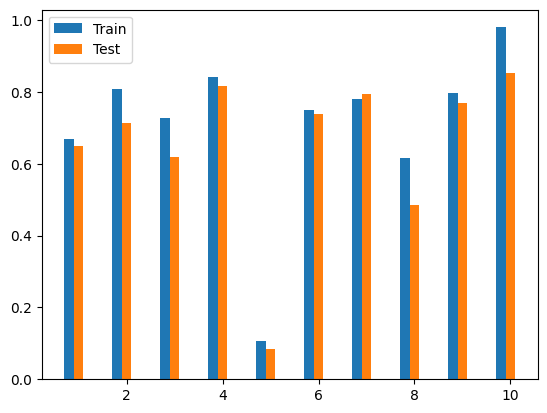

In [12]:
# Plot the data
xx = np.array(range(1, 11))
plt.bar(xx-0.2, train_accuracy, width=0.2)
plt.bar(xx, test_accuracy, width=0.2)
plt.legend(["Train", "Test"])
plt.show()

### Please answer the questions below to complete the experiment:




In [13]:
#@title In this experiment, the hyperparameters have very limited impact (maximum of 1% to 2% shift in accuracies) on increasing the accuracy of the model? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE", "FALSE"]

In [14]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [15]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Its good" #@param {type:"string"}


In [16]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [17]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [18]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [19]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [20]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1515
Date of submission:  17 Jan 2025
Time of submission:  18:29:56
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
